<a href="https://colab.research.google.com/github/alexanderbeleno16/parcial_corte1_mi_20241/blob/main/parcial_corte1_mi_20241.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PARCIAL CORTE 1 MI 2024-1 NOCTURNO**

## CORPORACIÓN UNIVERSITARIA LATINOAMERICANA

### PRESENTADO POR:

### ALEXANDER BELEÑO, VANESSA BAENA, JHON DIAZ


## **INFORMACIÓN RELACIONADA AL DATASET**
Vía 5 - Municipio de Chía
Datos georreferenciados sobre vías principales del Municipio de Chía en zona urbana.

## **REFERENCIA DEL DATASET**
https://www.datos.gov.co/Ordenamiento-Territorial/V-a-5-Municipio-de-Ch-a/e49y-vcxq

### **Enlace de descarga directa:**
https://www.datos.gov.co/api/views/dvvz-j9p4/rows.csv?accessType=DOWNLOAD

## **IMPORTACIÓN DE LIBRERIAS**
En esta sección del código se realizan las importaciones correspondientes a cada librería que permitiran la realización exitosa de la lectura y el tratamiento de los datos del archivo ".csv".

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **CARGUE Y LECTURA DEL ARCHIVO CSV**
En esta sección del código se carga los datos del archivo CSV en un objeto llamado data_frame

In [3]:
data_frame = pd.read_csv('drive/MyDrive/files/V5.csv')

## **NOMBRE Y TIPO DE DATOS DE LAS COLUMNAS**

La función **data_frame.info()** en Pandas proporciona un resumen conciso de la estructura y la información básica sobre el DataFrame cargado. RangeIndex: 522 entries, 0 to 521: Indica que el DataFrame tiene un índice que va desde 0 hasta 521, y contiene un total de 522 filas (entradas).

**Data columns (total 11 columns):** Indica que hay un total de 11 columnas en el DataFrame.

**Column:** Lista los nombres de las columnas.

**Non-Null Count:** Muestra el número de valores no nulos en cada columna, lo que indica cuántos valores válidos hay en cada columna. En este caso, todas las columnas tienen 522 valores no nulos, lo que significa que no hay valores faltantes en ninguna columna.

In [4]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FID_        522 non-null    int64  
 1   OBJECTID    522 non-null    int64  
 2   the_geom    522 non-null    object 
 3   Entity      522 non-null    object 
 4   Layer       522 non-null    object 
 5   Color       522 non-null    int64  
 6   Linetype    522 non-null    object 
 7   Elevation   522 non-null    float64
 8   LineWt      522 non-null    int64  
 9   RefName     0 non-null      float64
 10  Shape_Leng  522 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 45.0+ KB


## **LIMPIEZA DE LA DATA**

ANTES DE TRABAJAR LOS DATOS ES MUY IMPORTANTE CONOCERLOS Y LIMPIARLO PARA EVITAR DISTORCIONES.

Para este caso proceseremos con la limpieza de los datos de las columnas con las que vamos a trabajar,
en este caso las columnas "Shape_Leng"

**COLUMNA Shape_Leng:**
Redondeamos los decimales a enteros para la realizacion de la actividad.
Esto dividirá cada valor en la columna 'Shape_Leng' por 10, redondeará al entero más cercano y luego multiplicará por 10 nuevamente, lo que dará como resultado la aproximación al múltiplo de 10 más cercano.


In [5]:
# data_frame['Shape_Leng'] = data_frame['Shape_Leng'].round().astype(int)
data_frame['Shape_Leng'] = (data_frame['Shape_Leng'] / 10).round().astype(int) * 10

data_frame['Shape_Leng']

0       60
1      290
2      290
3       80
4       80
      ... 
517    290
518    170
519    170
520     80
521     80
Name: Shape_Leng, Length: 522, dtype: int64

Con la informacion anterior verificamos que no hay datos faltantes o nulos en nuestras columnas porque todas tienen el mismo valor (misma cantidad), lo cual es muy importante para verificar la integridad de nuestros datos.
Tambien verificamos la integridad de nuestras columnas cuantitativas (por el tipo de dato numerico) los cuales solo deben tener valores valores numericos.

Lo mas importante, en base al analisis que se va a realizar, aca podemos eliminar las columnas no seran necesaria en nuestro analisis, en este caso serian:

*   Columna "RefName" el cual está vacia.

*   Columna "the_geom" el cual no se tratara, manipulara o mostrara este dato/columna.


In [6]:
data_frame.pop('RefName')
data_frame.pop('the_geom')

0      MULTILINESTRING ((-74.05283799729392 4.8705298...
1      MULTILINESTRING ((-74.07886616956603 4.8471705...
2      MULTILINESTRING ((-74.07892744734691 4.8470645...
3      MULTILINESTRING ((-74.08362992290571 4.8499361...
4      MULTILINESTRING ((-74.08369236813222 4.8498313...
                             ...                        
517    MULTILINESTRING ((-74.05353203883644 4.8469334...
518    MULTILINESTRING ((-74.05668631486583 4.8845816...
519    MULTILINESTRING ((-74.05679755395732 4.8846310...
520    MULTILINESTRING ((-74.04825648629095 4.8686577...
521    MULTILINESTRING ((-74.04818026660867 4.8687551...
Name: the_geom, Length: 522, dtype: object

Comprobamos nuevamente los datos.

In [7]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   FID_        522 non-null    int64  
 1   OBJECTID    522 non-null    int64  
 2   Entity      522 non-null    object 
 3   Layer       522 non-null    object 
 4   Color       522 non-null    int64  
 5   Linetype    522 non-null    object 
 6   Elevation   522 non-null    float64
 7   LineWt      522 non-null    int64  
 8   Shape_Leng  522 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 36.8+ KB


## **PRIMEROS 5 REGISTROS**

La función data_frame.head() en Pandas se utiliza para mostrar las primeras filas del DataFrame. Por defecto, **muestra las primeras 5 filas** pero este número puede cambiar si así se desea. Esta función es útil para obtener una vista previa rápida de cómo se ven los datos en el DataFrame sin tener que mostrar todo el conjunto de datos, lo que puede ser especialmente útil si el DataFrame es grande.

In [8]:
data_frame.head()

,FID_,OBJECTID,Entity,Layer,Color,Linetype,Elevation,LineWt,Shape_Leng
0,0,1,LWPolyline,vias 13.50,130,Continuous,0.0,30,60
1,0,2,LWPolyline,vias 13.50,130,Continuous,0.0,30,290
2,0,3,LWPolyline,vias 13.50,130,Continuous,0.0,30,290
3,0,4,LWPolyline,vias 13.50,130,Continuous,0.0,30,80
4,0,5,LWPolyline,vias 13.50,130,Continuous,0.0,30,80


Con la informacion anterior tenemos una buena comprencion de como estan organizados/distribuidos los datos.
Tambien que los valores son coherentes con los que se espera.

## **2 CAMPOS CÁTEGORICOS**

PARA LOS SIGUIENTES CAMPOS:
1. **Entity:** Esta columna parece representar el tipo de entidad geométrica, como "LWPolyline". Aunque podría argumentarse que es una categoría, en contextos de modelado de datos GIS (Sistemas de Información Geográfica), este tipo de campo a menudo se considera categórico ya que representa diferentes tipos de objetos geométricos (líneas, polígonos, puntos, etc.).
2.   **Layer:** Esta columna representa la capa a la que pertenecen los elementos. Las capas pueden considerarse categorías discretas en la organización de objetos en software de CAD o GIS.

## SE REALIZA:
1.   Métodos unique
2.   Histograma
3.   Torta
4.   Barra

##### **CAMPOS UNICOS**

In [9]:
data_frame['Entity'].unique()

array(['LWPolyline', 'Line', 'Arc'], dtype=object)

In [10]:
data_frame['Layer'].unique()

array(['vias 13.50', 'VIAS POR CONCLUIR'], dtype=object)

##### **HISTOGRAMA**
La función hist() se utiliza para especificar el número de contenedores o intervalos en los que se dividirá el rango de los datos para crear el histograma. En otras palabras, determina la cantidad de barras que se mostrarán en el histograma.

En este caso, bins=10 significa que se crearán 10 contenedores para representar los datos en el histograma. Ajustar el valor de bins puede ayudar a visualizar mejor la distribución de los datos y a detectar patrones o características importantes en ellos. Un número inadecuado de bins puede hacer que el histograma sea demasiado generalizado o demasiado detallado, por lo que elegir el valor correcto es importante para una visualización adecuada de los datos.

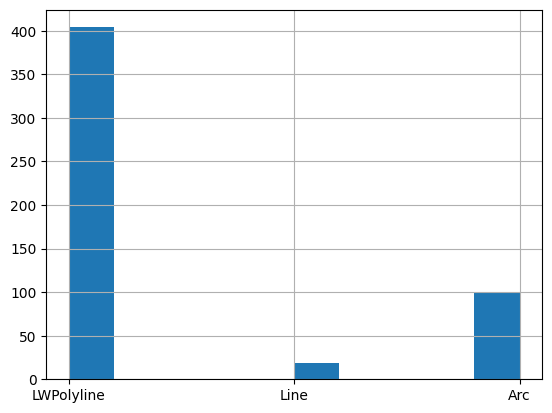

In [11]:
data_frame.loc[:, 'Entity'].hist(bins=10)
plt.show()

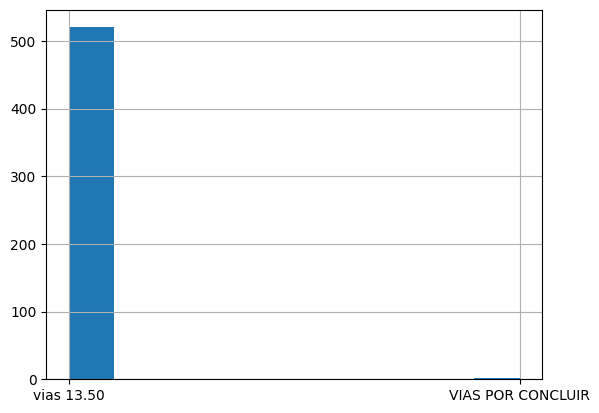

In [12]:
data_frame.loc[:, 'Layer'].hist(bins=10)
plt.show()

##### **GRAFICO DE TORTA**

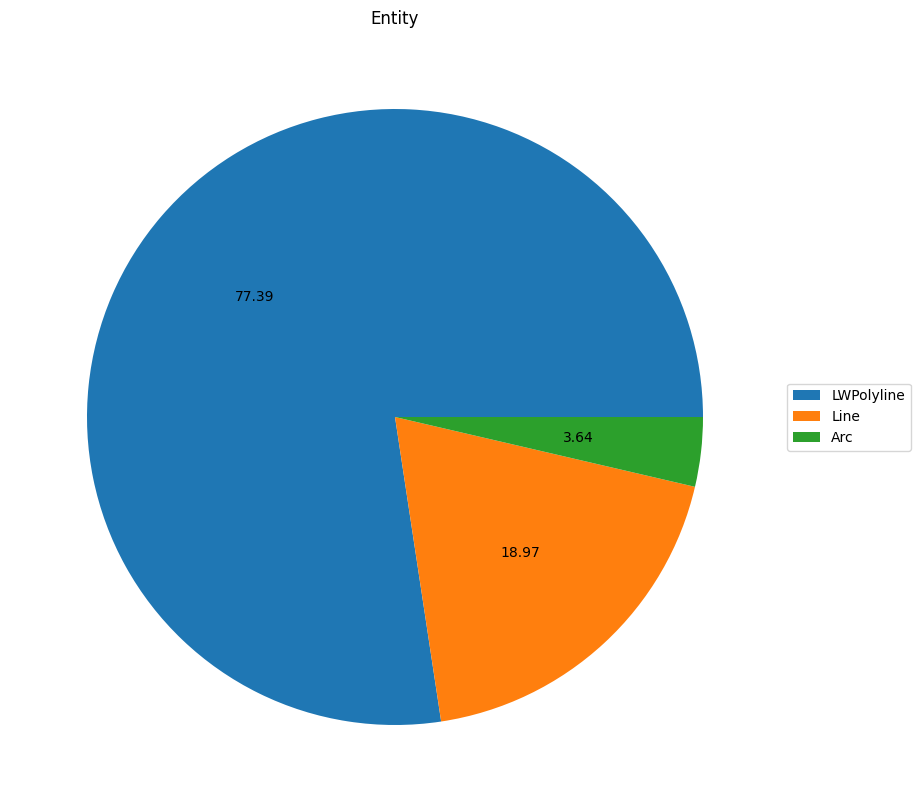

In [13]:
plt.figure(figsize=(10, 10))
plt.pie(data_frame["Entity"].value_counts(), labels=None, autopct="%.2f", startangle=0)
plt.legend(data_frame['Entity'].unique(), loc="center left", bbox_to_anchor=(1, 0.5))

plt.title('Entity')
plt.show()

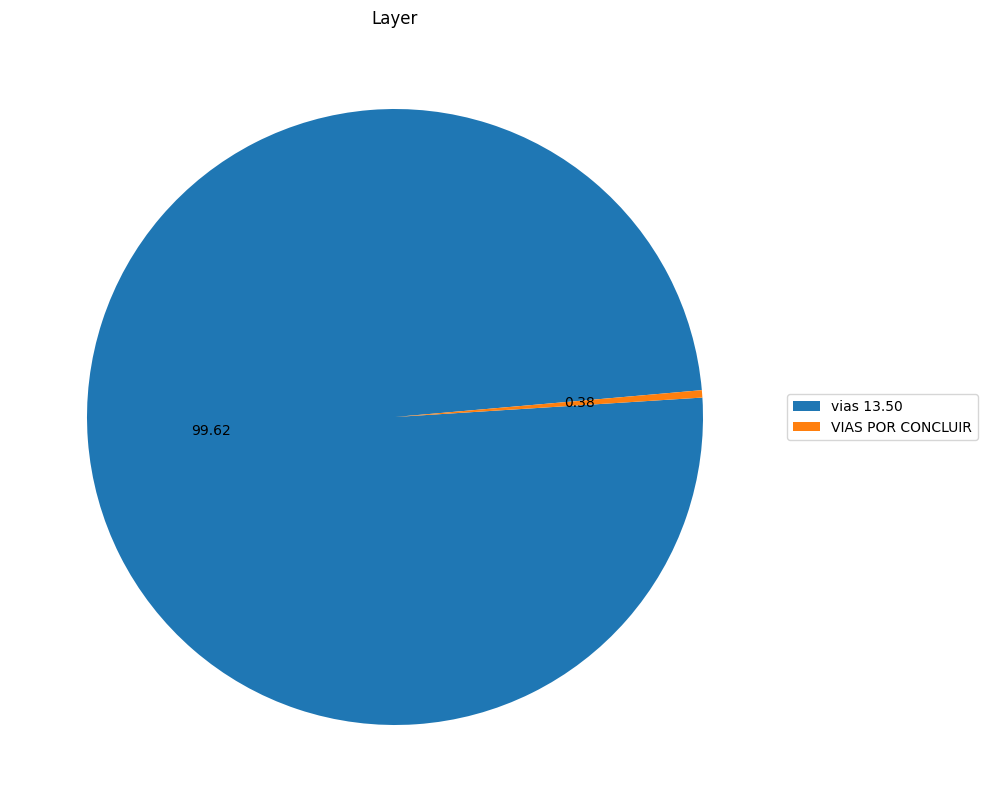

In [14]:
plt.figure(figsize=(10, 10))
plt.pie(data_frame["Layer"].value_counts(), labels=None, autopct="%.2f", startangle=5)
plt.legend(data_frame['Layer'].unique(), loc="center left", bbox_to_anchor=(1, 0.5))

plt.title('Layer')
plt.show()

##### **GRAFICO DE BARRAS**


 GRAFICO DE BARRAS (Entity): 
 Axes(0.125,0.11;0.775x0.77)


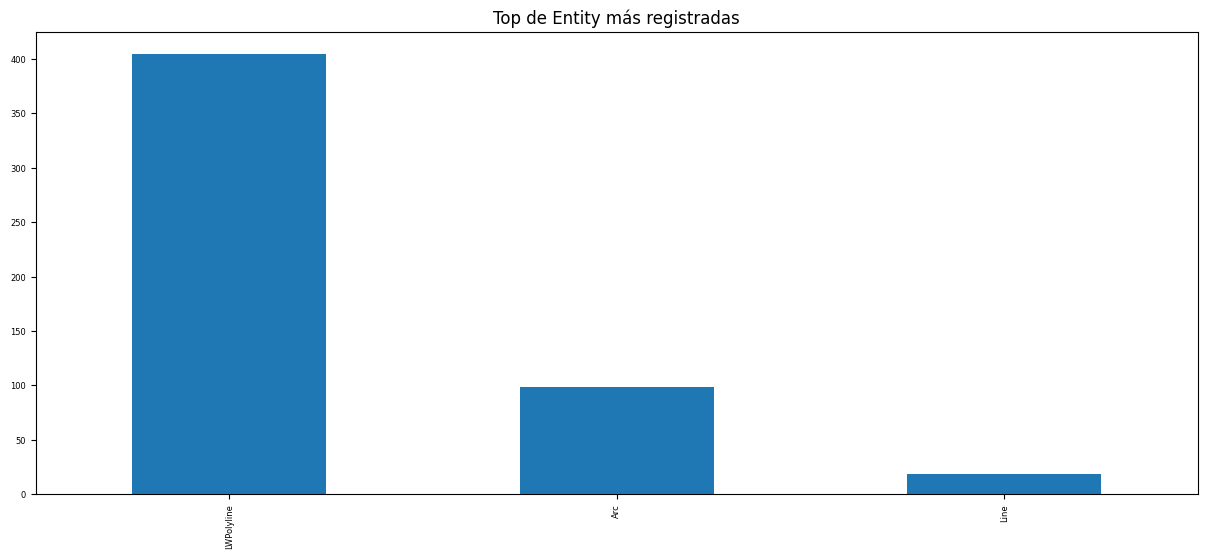

In [15]:
print("\n GRAFICO DE BARRAS (Entity): \n", data_frame["Entity"].value_counts().plot(kind="bar",figsize=(15,6),title="Top de Entity más registradas", fontsize=6))


 GRAFICO DE BARRAS (Layer): 
 Axes(0.125,0.11;0.775x0.77)


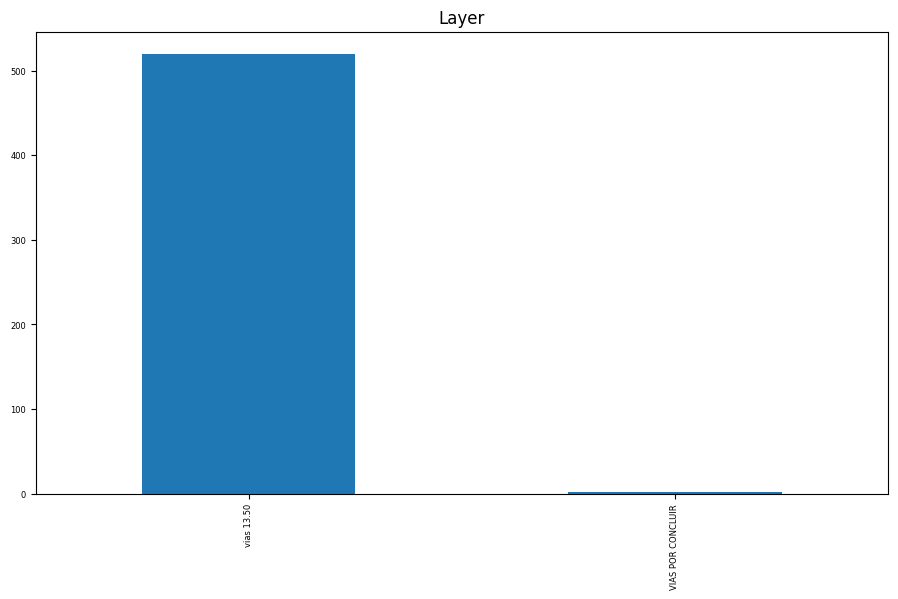

In [16]:
print("\n GRAFICO DE BARRAS (Layer): \n", data_frame["Layer"].value_counts().plot(kind="bar",figsize=(11,6),title="Layer", fontsize=6))

## **2 CAMPOS CONTINUOS**

PARA LOS SIGUIENTES CAMPOS:
1. **Color:** Este campo representa el codigo del color de los elementos y es un valor numérico continuo.
2. **Shape_Leng:** Representa la longitud de las entidades, y también es un valor numérico continuo.

## SE REALIZA:
1.   Métodos unique
2.   Histograma
3.   Bigote
4.   Torta
5.   Barra

##### **CAMPOS UNICOS**

In [17]:
data_frame['Color'].unique()

array([130,  40])

In [29]:
data_frame['Shape_Leng'].unique()

array([  60,  290,   80,   70,   10,   90,  190,  210,  710,  100,  490,
       1550,  390,  200,  130, 1320,  350,  270,  140,   20,   30,  160,
        170,    0,  110,  120,  150,   50,   40,  230,  510,  700,  430,
        450,  300,  770,  790,  250, 1290,  260,  280,  340,  180, 1410,
        620,  320,  380,  220,  240,  310,  500,  780,  520,  330,  650,
        660,  460,  480,  410])

##### **HISTOGRAMA**
La función hist() se utiliza para especificar el número de contenedores o intervalos en los que se dividirá el rango de los datos para crear el histograma. En otras palabras, determina la cantidad de barras que se mostrarán en el histograma.

En este caso, bins=10 significa que se crearán 10 contenedores para representar los datos en el histograma. Ajustar el valor de bins puede ayudar a visualizar mejor la distribución de los datos y a detectar patrones o características importantes en ellos. Un número inadecuado de bins puede hacer que el histograma sea demasiado generalizado o demasiado detallado, por lo que elegir el valor correcto es importante para una visualización adecuada de los datos.

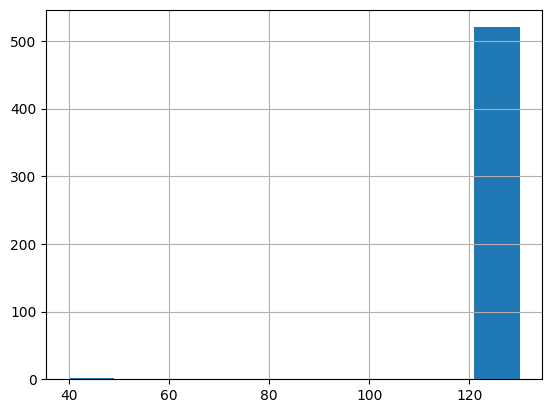

In [19]:
data_frame.loc[:, 'Color'].hist(bins=10)
plt.show()

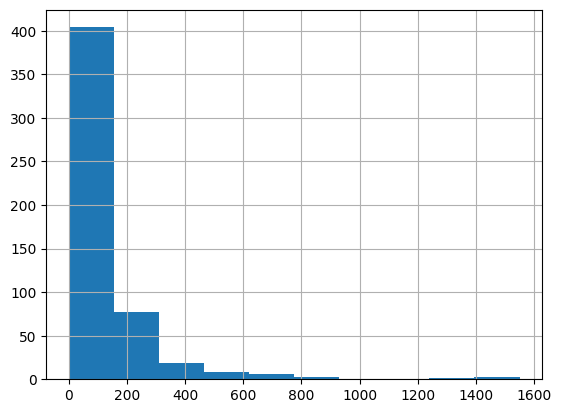

In [20]:
data_frame.loc[:, 'Shape_Leng'].hist(bins=10)
plt.show()

##### **GRAFICO DE BIGOTE**

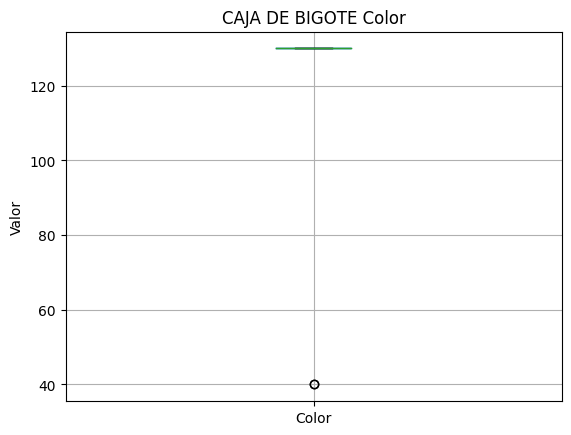

In [21]:
data_frame.boxplot(column='Color')
plt.title('CAJA DE BIGOTE Color')
plt.ylabel('Valor')
plt.show()

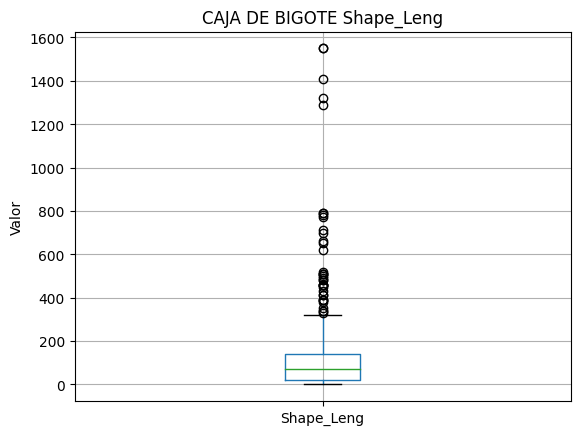

In [22]:
data_frame.boxplot(column='Shape_Leng')
plt.title('CAJA DE BIGOTE Shape_Leng')
plt.ylabel('Valor')
plt.show()

##### **GRAFICO DE TORTA**

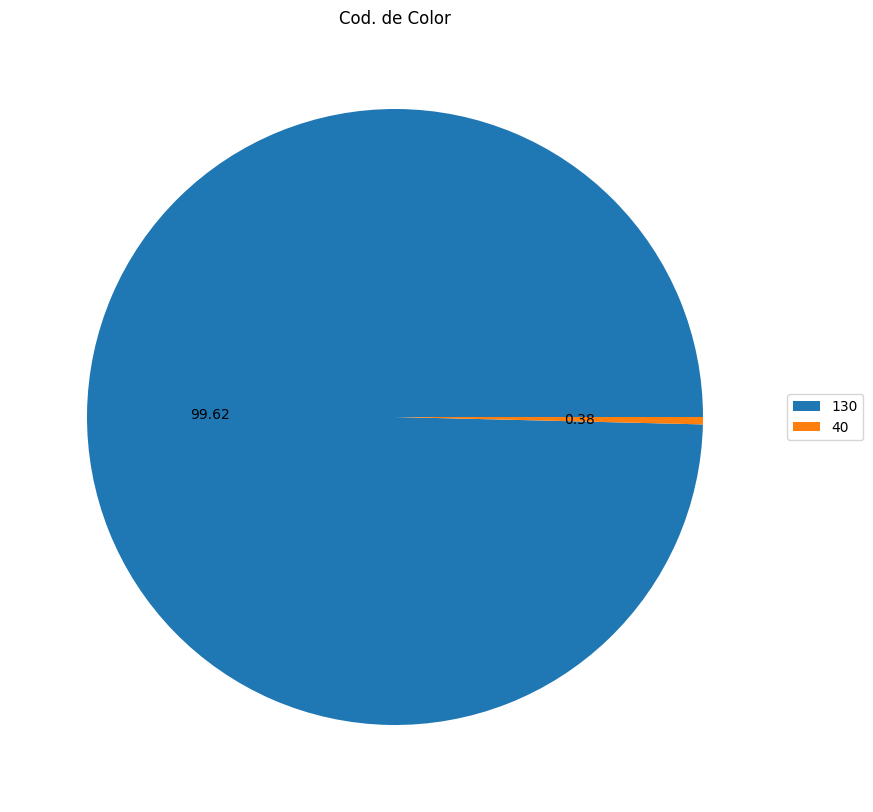

In [23]:
plt.figure(figsize=(10, 10))
plt.pie(data_frame["Color"].value_counts(), labels=None, autopct="%.2f", startangle=0)
plt.legend(data_frame['Color'].unique(), loc="center left", bbox_to_anchor=(1, 0.5))

plt.title('Cod. de Color')
plt.show()

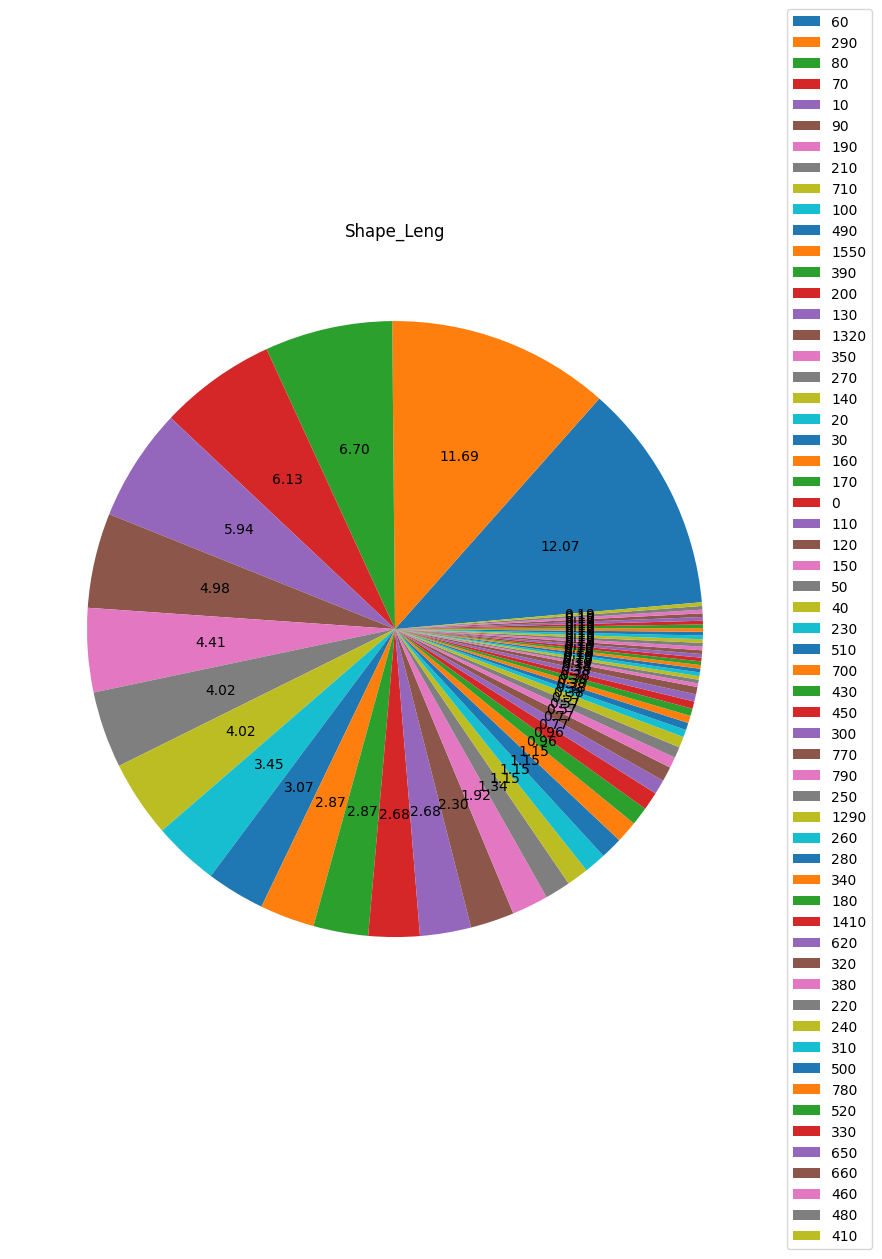

In [24]:
plt.figure(figsize=(10, 10))
plt.pie(data_frame["Shape_Leng"].value_counts(), labels=None, autopct="%.2f", startangle=5)
plt.legend(data_frame['Shape_Leng'].unique(), loc="center left", bbox_to_anchor=(1, 0.5))

plt.title('Shape_Leng')
plt.show()

##### **GRAFICO DE BARRAS**


 GRAFICO DE BARRAS (Color): 
 Axes(0.125,0.11;0.775x0.77)


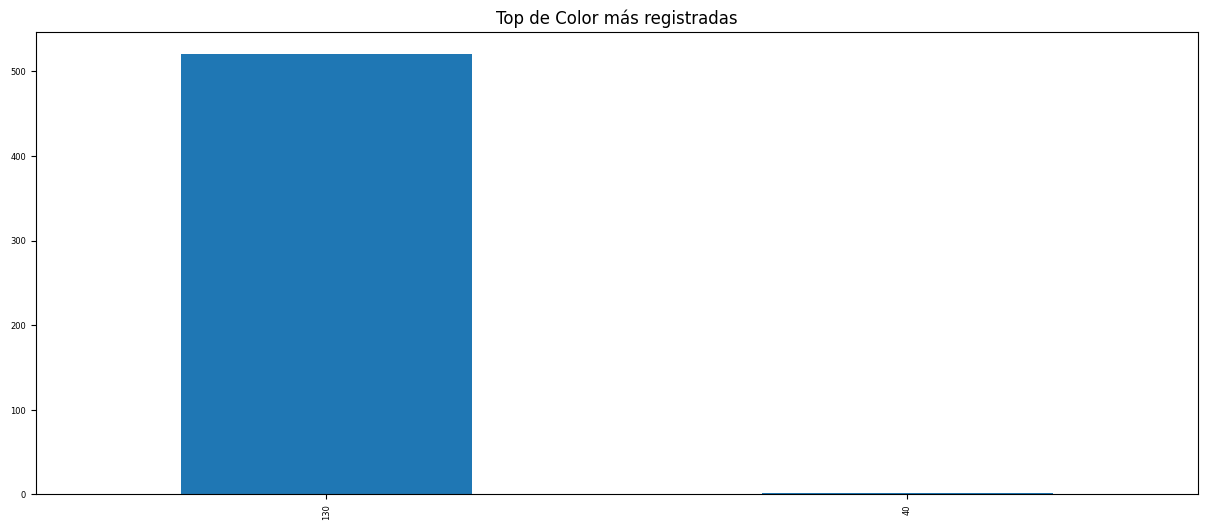

In [30]:
print("\n GRAFICO DE BARRAS (Color): \n", data_frame["Color"].value_counts().plot(kind="bar",figsize=(15,6),title="Top de Color más registradas", fontsize=6))


 GRAFICO DE BARRAS (Shape_Leng): 
 Axes(0.125,0.11;0.775x0.77)


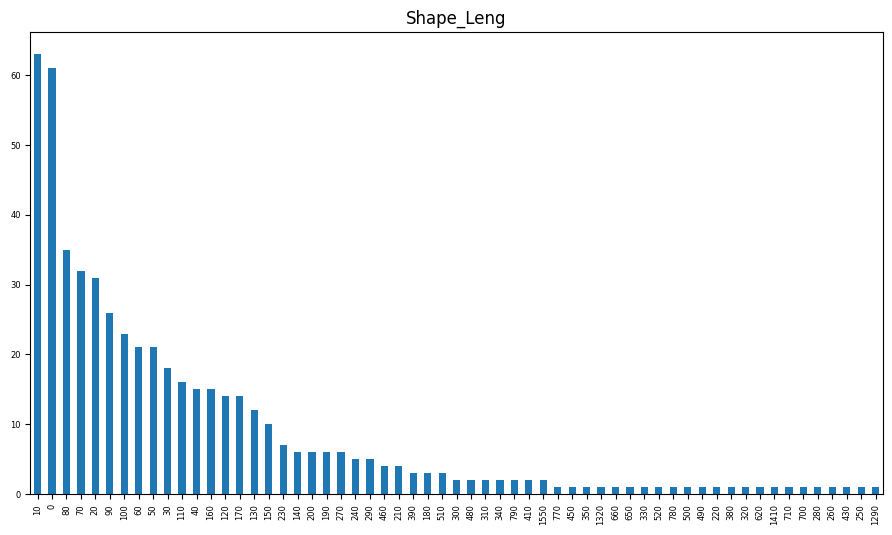

In [31]:
print("\n GRAFICO DE BARRAS (Shape_Leng): \n", data_frame["Shape_Leng"].value_counts().plot(kind="bar",figsize=(11,6),title="Shape_Leng", fontsize=6))

## **METODOS DE SUSTITUCIÓN**

### SE TOMA EL CAMPO CONTINUO

Para estos ejercicios de la actividad utilizaremos el campo 'Shape_Leng'.

##### **MEDIA**

La media aritmética se define como la suma de N elementos dividida entre N. Se trata una medida bastante conocida entre la gente, aunque tiene el inconveniente de que es muy susceptible a valores extremos. En pandas, el método que funciona para obtener el promedio o la media es mean().

In [37]:
print("Promedio: \n")
data_frame.loc[:, ['Shape_Leng']].mean()

Promedio: 



Shape_Leng    120.095785
dtype: float64

##### **MODA**

En Pandas, el método mode() se utiliza para calcular la moda de un DataFrame o de una Serie. La moda representa el valor que aparece con mayor frecuencia en un conjunto de datos.

Cuando aplicas mode() a un DataFrame, el método devuelve un nuevo DataFrame que contiene las modas de cada columna. Si hay varios valores que son igualmente frecuentes y son la moda, mode() devolverá todos esos valores.

In [38]:
print("Moda: \n")
data_frame.loc[:, ['Shape_Leng']].mode()

Moda: 



,Shape_Leng
0,10


##### **MEDIANA**
La mediana es el valor que dentro del conjunto de datos es menor que el 50% de los datos y mayor que el 50% restante. En pandas, el método que funciona para obtener el promedio o la media es **median()**.

In [39]:
print("Mediana: \n")
data_frame.loc[:, ['Shape_Leng']].median()

Mediana: 



Shape_Leng    70.0
dtype: float64

##### ALMACENAR LA MEDIA, MODA Y MEDIANA EN VARIABLES

In [40]:
media = data_frame.loc[:, ['Shape_Leng']].mean()
moda = data_frame.loc[:, ['Shape_Leng']].mode()
mediana = data_frame.loc[:, ['Shape_Leng']].median()

Shape_Leng    120.095785
dtype: float64    Shape_Leng
0          10 Shape_Leng    70.0
dtype: float64


##### CREAR COPIA DEL DATAFRAME

In [42]:
copia_data_frame = data_frame
copia_data_frame

,FID_,OBJECTID,Entity,Layer,Color,Linetype,Elevation,LineWt,Shape_Leng
0,0,1,LWPolyline,vias 13.50,130,Continuous,0.0,30,60
1,0,2,LWPolyline,vias 13.50,130,Continuous,0.0,30,290
2,0,3,LWPolyline,vias 13.50,130,Continuous,0.0,30,290
3,0,4,LWPolyline,vias 13.50,130,Continuous,0.0,30,80
4,0,5,LWPolyline,vias 13.50,130,Continuous,0.0,30,80
...,...,...,...,...,...,...,...,...,...
517,0,518,LWPolyline,vias 13.50,130,Continuous,0.0,30,290
518,0,519,LWPolyline,vias 13.50,130,Continuous,0.0,30,170
519,0,520,LWPolyline,vias 13.50,130,Continuous,0.0,30,170
520,0,521,LWPolyline,VIAS POR CONCLUIR,40,Continuous,0.0,0,80


##### ELIMINAR AL AZAR EL 10% DE REGISTROS

In [50]:
# Calcula el número de filas a eliminar
rows_to_drop = int(len(copia_data_frame) * 0.1)

# Selecciona aleatoriamente las filas a eliminar
rows_to_drop_indices = copia_data_frame['Shape_Leng'].sample(n=rows_to_drop).index

# Elimina las filas seleccionadas
copia_data_frame.drop(index=rows_to_drop_indices, inplace=True)

# de 381 quedan 343
# el 10% es 38
# Se eliminaron 38 registros en la copia del data frame
copia_data_frame

,FID_,OBJECTID,Entity,Layer,Color,Linetype,Elevation,LineWt,Shape_Leng
6,0,7,Line,vias 13.50,130,Continuous,0.0,30,10
9,0,10,LWPolyline,vias 13.50,130,Continuous,0.0,30,210
12,0,13,LWPolyline,vias 13.50,130,Continuous,0.0,30,60
13,0,14,LWPolyline,vias 13.50,130,Continuous,0.0,30,90
14,0,15,LWPolyline,vias 13.50,130,Continuous,0.0,30,100
...,...,...,...,...,...,...,...,...,...
513,0,514,LWPolyline,vias 13.50,130,Continuous,0.0,30,180
515,0,516,Arc,vias 13.50,130,Continuous,0.0,30,10
516,0,517,LWPolyline,vias 13.50,130,Continuous,0.0,30,20
519,0,520,LWPolyline,vias 13.50,130,Continuous,0.0,30,170
